# Henry Gu - Machine Learning - Final - Convolutional Neural Network / Autoencoder / MNST Dataset

In this part of the final, we complete two tasks in relation to the MNST Dataset. Firstly, we develop a Convolutional Neural Network to perform classification of digits. Secondly, we develop two Autoencoders, one using the clean dataset and one using a dataset with noise injected as inputs.

# Load Packages

In [ ]:
import numpy as np
import pandas as pd

# Load Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


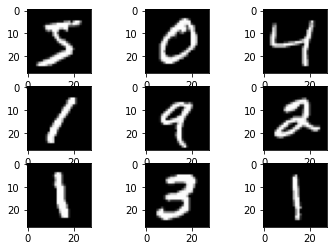

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

# Data Processing

In [ ]:
# Reshape the data
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)  

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
# Rescale the data
x_train = x_train.astype('float32') 
x_train = x_train / 255.0

x_test = x_test.astype('float32')
x_test = x_test / 255.0

In [ ]:
# Encode the y variable
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder( handle_unknown='error')                 
encoder.fit(pd.DataFrame(y_train)) 
encoded = encoder.transform(pd.DataFrame(y_train)).toarray()
y_train = pd.DataFrame(encoded)
y_train.columns = list(encoder.get_feature_names())
encoded = encoder.transform(pd.DataFrame(y_test)).toarray()
y_test = pd.DataFrame(encoded)
y_test.columns = list(encoder.get_feature_names())

# Part 1 - Convolutional Neural Networks

## Simple multi-layer perceptron (MLP)
First we consider the performance of a model that uses Dense layers

### Build Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from numpy.random import seed
import random as rn
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten

rn.seed(12)
np.random.seed(12)
tf.compat.v1.set_random_seed(12)
seed(1)
tf.random.set_seed(12)

def build_mlp_model():
    model = Sequential()
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model = build_mlp_model()

### Train Model

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='auto')
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=20, callbacks=[es])

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2938 - accuracy: 0.9142 - val_loss: 0.1614 - val_accuracy: 0.9499
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1367 - accuracy: 0.9588 - val_loss: 0.1126 - val_accuracy: 0.9653
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1005 - accuracy: 0.9694 - val_loss: 0.1054 - val_accuracy: 0.9674
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0829 - accuracy: 0.9744 - val_loss: 0.0970 - val_accuracy: 0.9708
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0687 - accuracy: 0.9786 - val_loss: 0.0932 - val_accuracy: 0.9716
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0594 - accuracy: 0.9811 - val_loss: 0.0833 - val_accuracy: 0.9762
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0496 - accuracy: 0.9841 - val_loss: 0.0917 - val_accuracy:

### Evaluate Model

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.09363067150115967
Test accuracy: 0.9733999967575073


## Simple CNN Model
Next we consider a basic CNN architecture

### Build Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from numpy.random import seed
import random as rn
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten

rn.seed(12)
np.random.seed(12)
tf.compat.v1.set_random_seed(12)
seed(1)
tf.random.set_seed(12)

def build_cnn_model():
    model = Sequential()

    model.add(Conv2D(32, kernel_size =(5,5), activation = 'relu' ))
    model.add(MaxPool2D(2))
    model.add(Conv2D(32, kernel_size =(5,5), activation = 'relu' ))
    model.add(MaxPool2D(2))
    model.add(Dense(10,activation= 'relu'))   
    model.add(Flatten())
    model.add(Dense(10,activation= 'softmax'))   

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model = build_cnn_model()

### Train Model

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='auto')
model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/15
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1936 - accuracy: 0.9411 - val_loss: 0.0710 - val_accuracy: 0.9758
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0664 - accuracy: 0.9795 - val_loss: 0.0462 - val_accuracy: 0.9845
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0497 - accuracy: 0.9839 - val_loss: 0.0591 - val_accuracy: 0.9805
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0405 - val_accuracy: 0.9873
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0379 - val_accuracy: 0.9868
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0312 - val_accuracy: 0.9896
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0375 - val_ac

### Evaluate Model

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.03589436411857605
Test accuracy: 0.9898999929428101


We find that the CNN performs much better on digit identification compared to the MLP architecture.

# Part 2 - Autoencoders
## Simple Autoencoder

### Build Model

In [ ]:
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Reshape, Input

# Encoder layers
encoding_dim = 4
encoded = Sequential()
encoded.add(Flatten())
encoded.add(Dense(512,activation='relu') )
encoded.add(Dense(256,activation='relu') )
encoded.add(Dense(128,activation='relu') )
encoded.add(Dense(encoding_dim,activation='relu') )

# Decoder layers
decoded = Sequential()
decoded.add(Dense(128, activation = 'relu'))
decoded.add(Dense(256, activation = 'relu'))
decoded.add(Dense(512, activation = 'relu'))   
decoded.add(Dense(784, activation = 'sigmoid'))
decoded.add(Reshape((28,28)))

input_x = Input(shape=(28, 28, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='mse')

### Train Model

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
history = autoencoder.fit(x=x_train, y=x_train, epochs=50, validation_data=(x_test, x_test), callbacks=[es])

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0446 - val_loss: 0.0339
Epoch 2/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0317 - val_loss: 0.0301
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0291 - val_loss: 0.0287
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0278 - val_loss: 0.0271
Epoch 5/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0270 - val_loss: 0.0266
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0262 - val_loss: 0.0263
Epoch 7/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0257 - val_loss: 0.0257
Epoch 8/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0254 - val_loss: 0.0257
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0250 - val_loss: 0.0253
Epoch 10/50
1875/1875 [==============================] - 10s 5ms/step - l

### Evaluate Model

In [ ]:
results = autoencoder.evaluate(x_test, x_test, verbose=0)  
print("val loss(MSE):", results)

val loss(MSE): 0.024077480658888817


Plot of encoded images

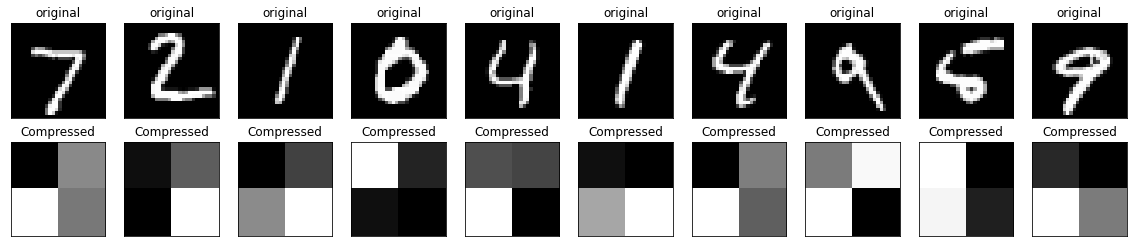

In [ ]:
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(2,2))
  plt.title("Compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Plot of decoded images

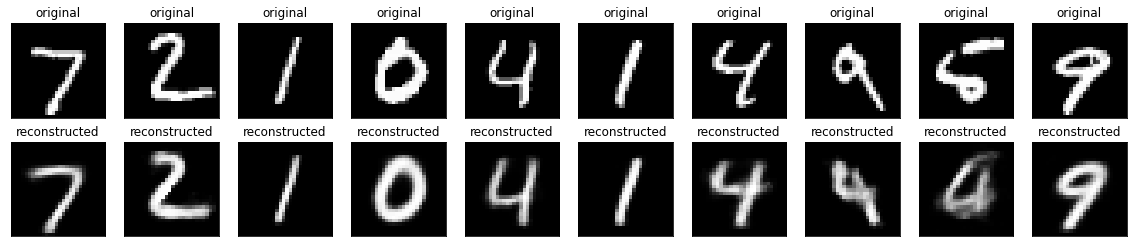

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Denoising Autoencoder

In [ ]:
# Add some white noise into the original MNIST images
import numpy as np
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Plot the noised images

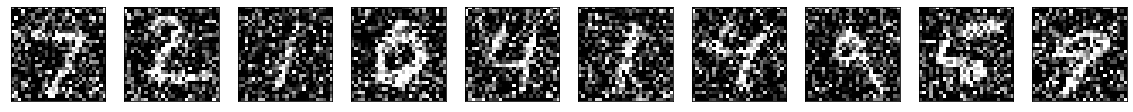

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Build Model

In [ ]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input
from keras.layers import UpSampling2D

# encoder layers
encoded = Sequential()
encoded.add(Conv2D(512,  (3, 3)  ,activation='relu', padding='same') )
encoded.add(MaxPool2D( (2,2), padding='same') )
encoded.add(Conv2D(256,  (3, 3)  ,activation='relu', padding='same') )
encoded.add(MaxPool2D( (2,2), padding='same') )

# decoder layers
decoded = Sequential()
decoded.add(Conv2D(256,  (3, 3)  ,activation='relu', padding='same') )  
decoded.add(UpSampling2D((2,2)))
decoded.add(Conv2D(512,  (3, 3)  ,activation='relu', padding='same') )   
decoded.add(UpSampling2D((2,2)))
decoded.add(Conv2D(1,  (3, 3)  ,activation='sigmoid', padding='same') )

img_x = 28
img_y = 28
input_x = Input(shape=(img_x, img_y, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Train Model

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
autoencoder.fit(x_train_noisy, x_train ,epochs=80, validation_data=(x_test_noisy, x_test), callbacks=[es]) 

Epoch 1/80
1875/1875 [==============================] - 105s 55ms/step - loss: 0.1090 - val_loss: 0.0970
Epoch 2/80
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0944 - val_loss: 0.0927
Epoch 3/80
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0926 - val_loss: 0.0941
Epoch 4/80
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0916 - val_loss: 0.0920
Epoch 5/80
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0907 - val_loss: 0.0911
Epoch 6/80
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0901 - val_loss: 0.0917
Epoch 7/80
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0895 - val_loss: 0.0907
Epoch 8/80
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0889 - val_loss: 0.0908
Epoch 9/80
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0884 - val_loss: 0.0908
Epoch 10/80
1875/1875 [==============================] 

### Evaluate Model

In [ ]:
train_results = autoencoder.evaluate(x_train_noisy, x_train)
print('Training Loss:', train_results)

test_results = autoencoder.evaluate(x_test_noisy, x_test)
print('Test Loss', test_results)

1875/1875 [==============================] - 36s 19ms/step - loss: 0.0869
Training Loss: 0.08685926347970963
313/313 [==============================] - 6s 20ms/step - loss: 0.0914
Test Loss 0.09140978008508682


Plot of noised images and their corresponding reconstructed images

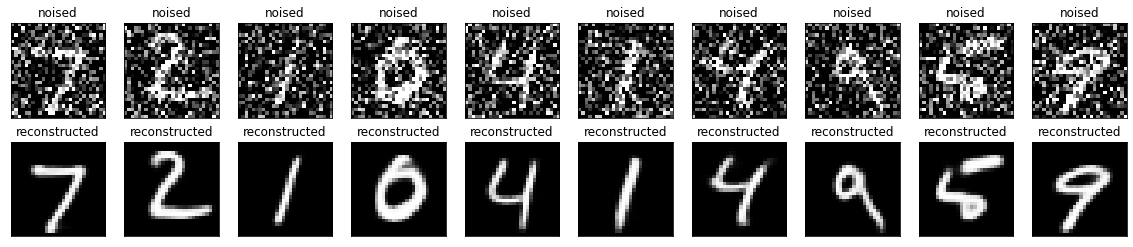

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("noised")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()